# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [8]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

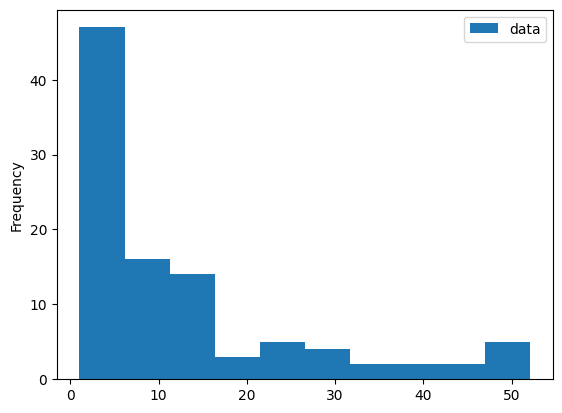

In [9]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

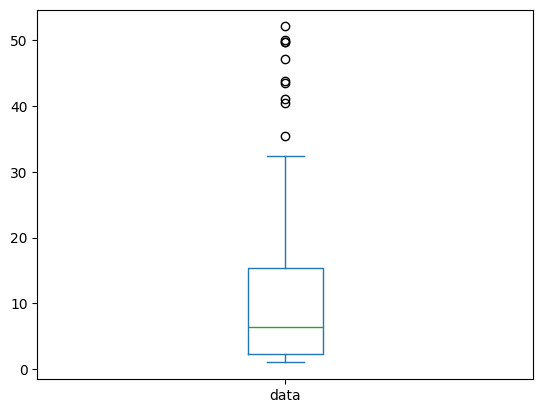

In [10]:
df.plot.box()

In [11]:
Hist_Pros = "Shows the full shape of the data distribution; Useful for identifying common values and patterns"
Hist_Cons = "Sensitive to bin-size; Doesn't directly show key summary statistics such as median or quartiles"

Box_Pros = "Summarizes key statistics clearly and potential outliers; Takes up less space and good for comparing multiple distributions"
Box_Cons = "Doesn't show detailed shape of distribution; Perhaps less intuitive if unfamiliar with box plot components"

My_Choice = "I would choose the histogram because it provides a clearer sense of how the values are distributed overall — which is especially useful in this case, as the data is exponentially distributed and likely skewed."

Format_Improvement = "Add grid lines / labels to histogram axes for better readability; Include vertical line marking the 75th percentile; Choose a bin size which balances detail with clarity; Add a title to indicate what the histogram represents"

In [12]:
print("Histogram - Pros:", Hist_Pros)
print("Histogram - Cons:", Hist_Cons)
print("Box Plot - Pros:", Box_Pros)
print("Box Plot - Cons:", Box_Cons)
print("My Choice:", My_Choice)
print("Formatting Improvements:", Format_Improvement)

Histogram - Pros: Shows the full shape of the data distribution; Useful for identifying common values and patterns
Histogram - Cons: Sensitive to bin-size; Doesn't directly show key summary statistics such as median or quartiles
Box Plot - Pros: Summarizes key statistics clearly and potential outliers; Takes up less space and good for comparing multiple distributions
Box Plot - Cons: Doesn't show detailed shape of distribution; Perhaps less intuitive if unfamiliar with box plot components
My Choice: I would choose the histogram because it provides a clearer sense of how the values are distributed overall — which is especially useful in this case, as the data is exponentially distributed and likely skewed.
Formatting Improvements: Add grid lines / labels to histogram axes for better readability; Include vertical line marking the 75th percentile; Choose a bin size which balances detail with clarity; Add a title to indicate what the histogram represents


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [13]:
import matplotlib.pyplot as plt

In [14]:
#Load the Data into a DataFrame
df = pd.read_csv("renewable_energy_trends.csv")

print(df.head())

   Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088


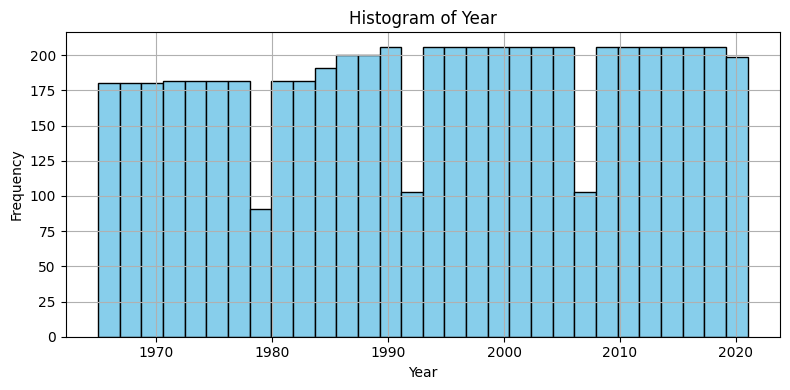

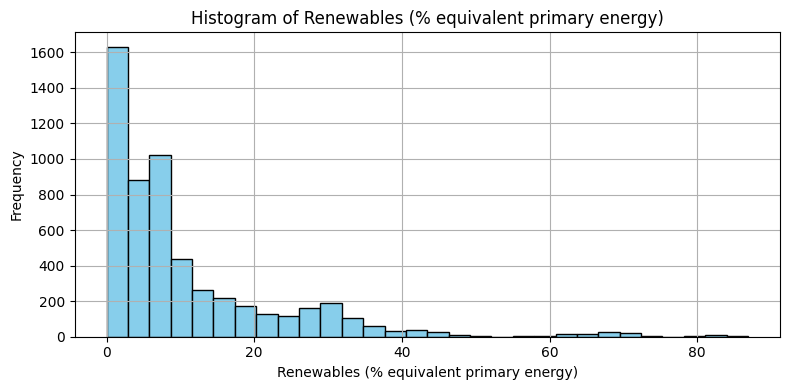

In [15]:
df = pd.read_csv("renewable_energy_trends.csv")

# Loop Through Each Numeric Column / Plot Histograms
for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
import seaborn as sns

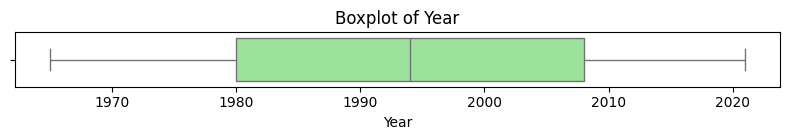

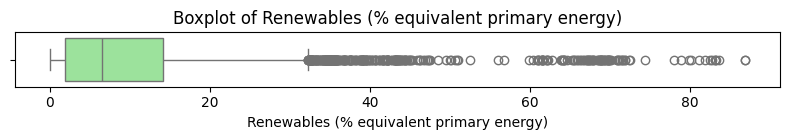

In [17]:
# Histogram Variant 1
# Box Plot

for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

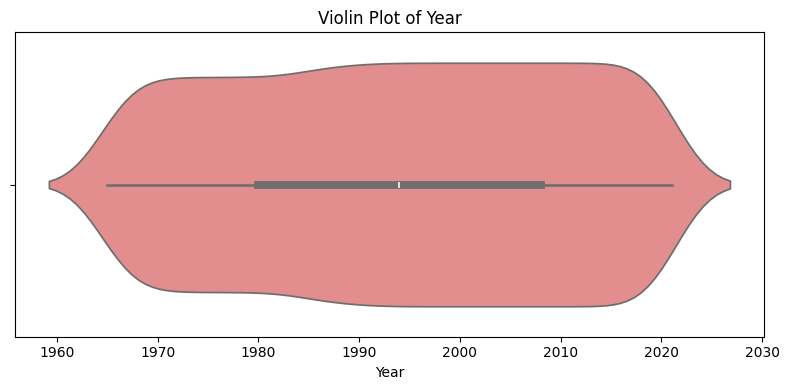

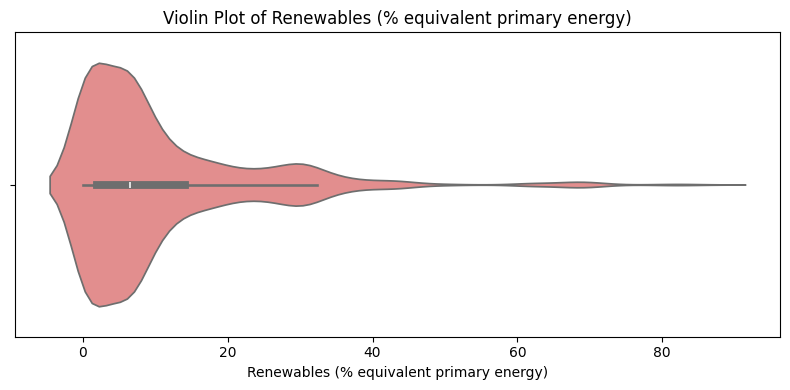

In [18]:
# Violin Plot

for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[column], color='lightcoral')
    plt.title(f"Violin Plot of {column}")
    plt.tight_layout()
    plt.show()

    #LOL

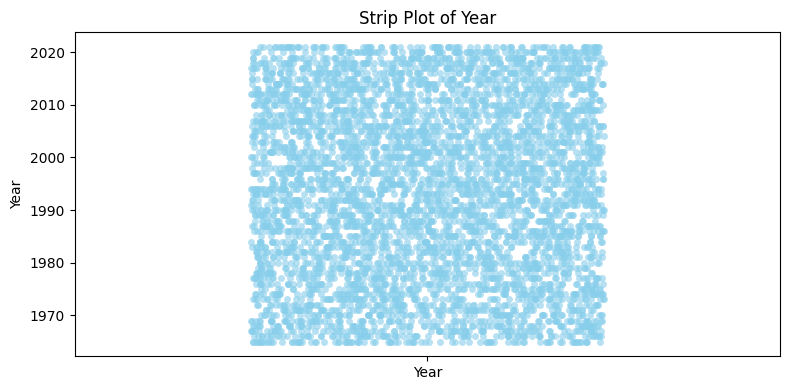

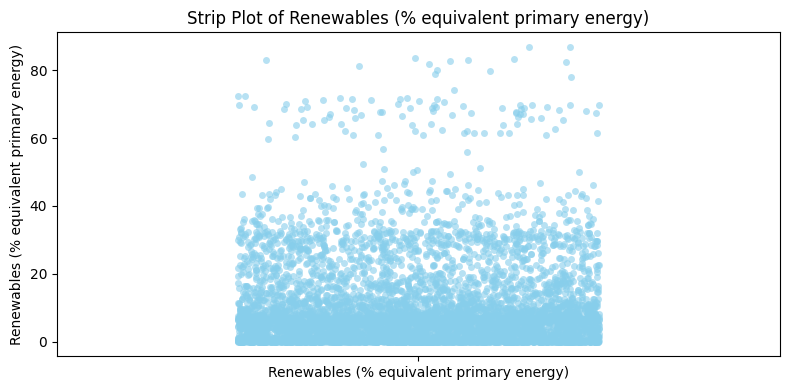

In [19]:
# Strip Plot

for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    
    # Plot strip plot with a dummy x-axis label
    sns.stripplot(x=[column] * len(df), y=df[column], jitter=0.25, color='skyblue', alpha=0.6)
    
    plt.title(f"Strip Plot of {column}")
    plt.xlabel("")         
    plt.ylabel(column)       
    plt.tight_layout()
    plt.show()

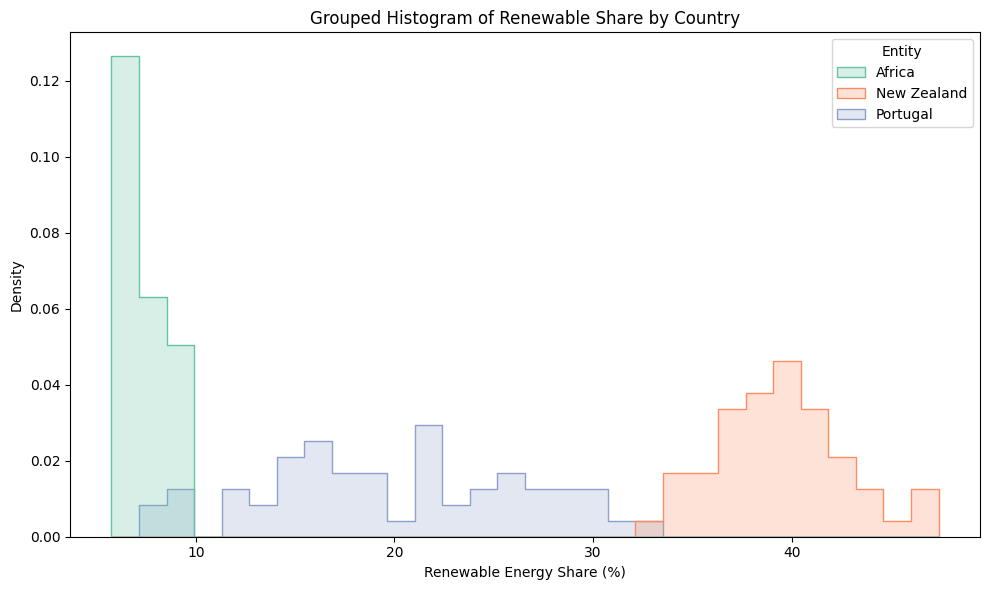

In [20]:
# Grouped Histogram (comparison across Africa, New Zealand, and Portugal)

selected_countries = ["Africa", "New Zealand", "Portugal"]
filtered_df = df[df["Entity"].isin(selected_countries)]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x="Renewables (% equivalent primary energy)", hue="Entity", 
             bins=30, kde=False, palette="Set2", element="step", stat="density")

plt.title("Grouped Histogram of Renewable Share by Country")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

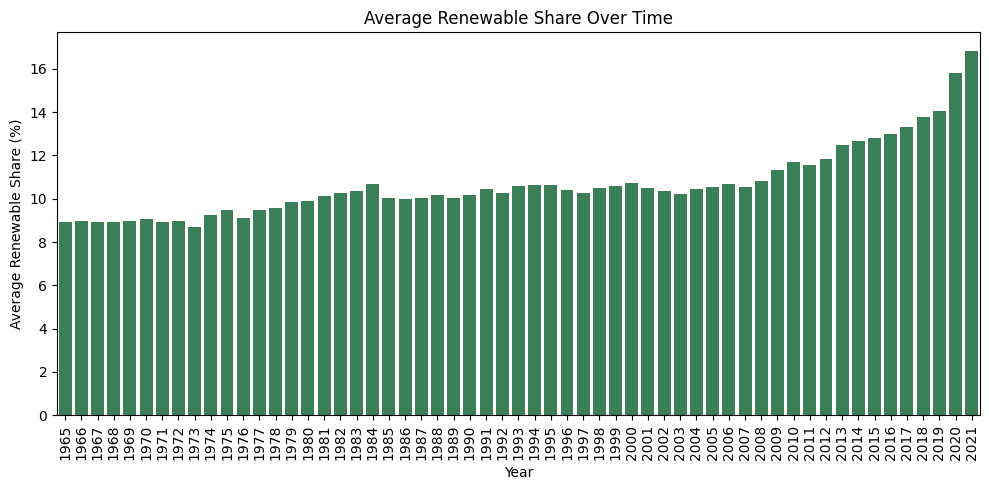

In [21]:
avg_by_year = df.groupby("Year")["Renewables (% equivalent primary energy)"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_by_year.index, y=avg_by_year.values, color="seagreen")

plt.title("Average Renewable Share Over Time")
plt.xlabel("Year")
plt.ylabel("Average Renewable Share (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_27472\1355006576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_country.index, y=avg_by_country.values, palette="viridis")


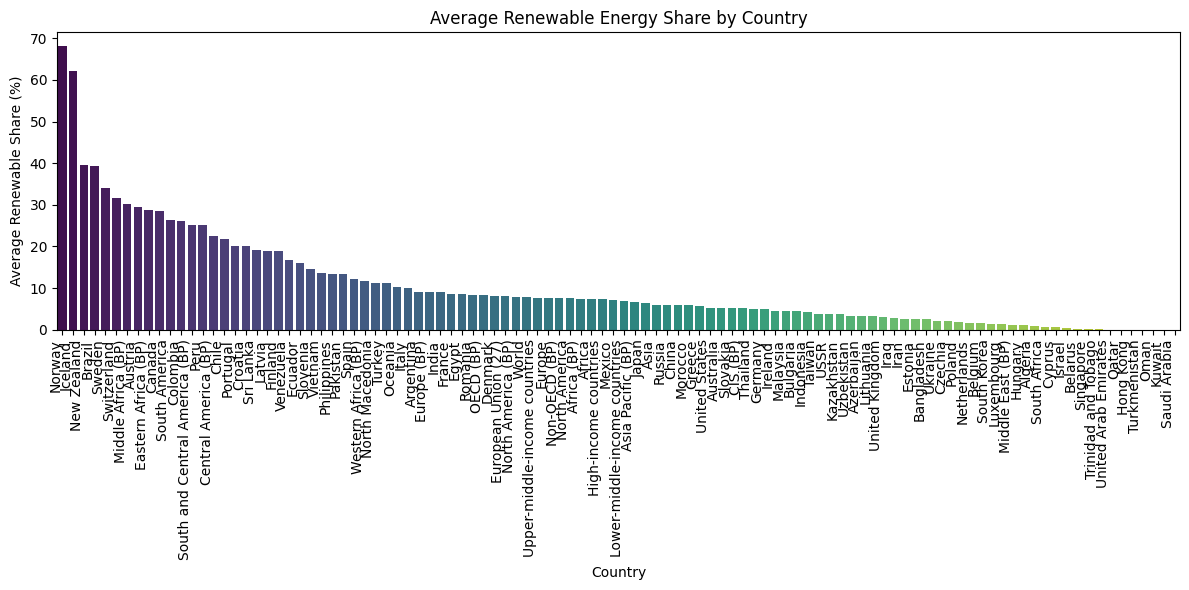

In [22]:
# Bar Plot

avg_by_country = df.groupby("Entity")["Renewables (% equivalent primary energy)"].mean().sort_values(ascending=False)
avg_by_country = avg_by_country[avg_by_country > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_by_country.index, y=avg_by_country.values, palette="viridis")

filtered_df = df[df["Renewables (% equivalent primary energy)"] > 0]

avg_by_country = filtered_df.groupby("Entity")["Renewables (% equivalent primary energy)"].mean().sort_values(ascending=False)

plt.title("Average Renewable Energy Share by Country")
plt.ylabel("Average Renewable Share (%)")
plt.xlabel("Country")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Means, Medians, and Modes

df_clean = df.dropna()

means = df.mean(numeric_only=True)
print("Means:\n", means)

medians = df.median(numeric_only=True)
print("Medians:\n", medians)

modes = df.mode(numeric_only=True)
print("Modes:\n", modes)

Means:
 Year                                        1993.800821
Renewables (% equivalent primary energy)      10.735585
dtype: float64
Medians:
 Year                                        1994.000000
Renewables (% equivalent primary energy)       6.522184
dtype: float64
Modes:
     Year  Renewables (% equivalent primary energy)
0   1990                                       0.0
1   1991                                       NaN
2   1992                                       NaN
3   1993                                       NaN
4   1994                                       NaN
5   1995                                       NaN
6   1996                                       NaN
7   1997                                       NaN
8   1998                                       NaN
9   1999                                       NaN
10  2000                                       NaN
11  2001                                       NaN
12  2002                                       NaN
13  20

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

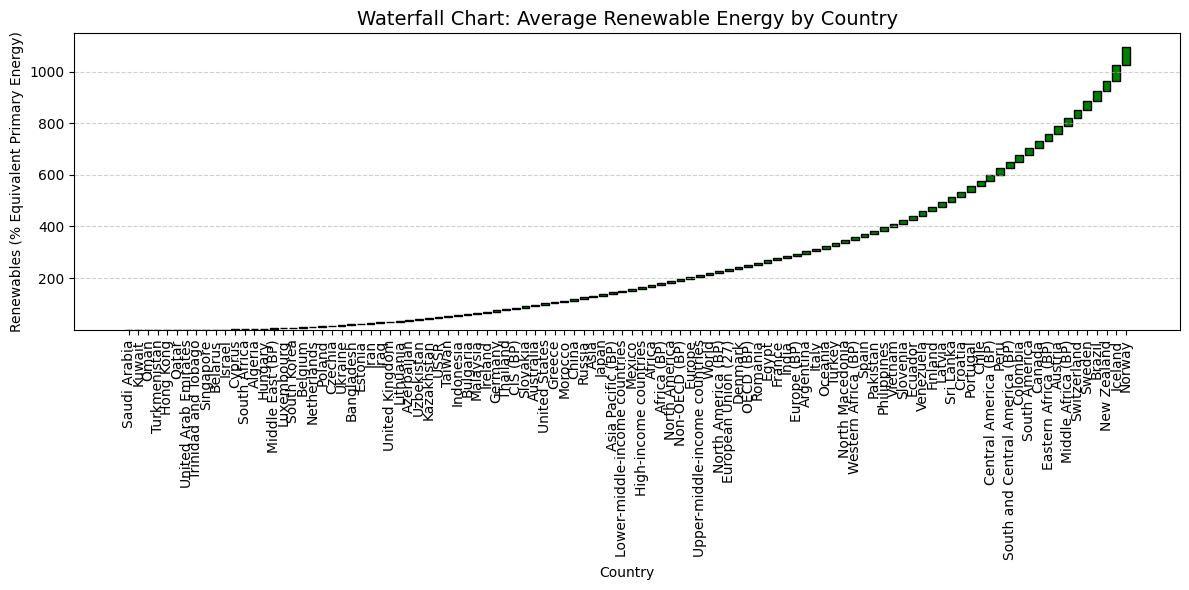

In [24]:
# Waterfall Chart (pg. 56 from Storytelling with Data reading)

df_clean = df.dropna(subset=["Entity", "Renewables (% equivalent primary energy)"])
avg_by_country = (
    df_clean.groupby("Entity")["Renewables (% equivalent primary energy)"]
    .mean()
    .sort_values()
    .reset_index()
)

avg_by_country.columns = ["Country", "Renewable_Avg"]
subset = avg_by_country.iloc[::10].reset_index(drop=True)

changes = subset["Renewable_Avg"].values
countries = subset["Country"].values
cumulative = np.insert(np.cumsum(changes[:-1]), 0, 0)

# Rename Columns for Cleaner Chart Appearance
avg_by_country.columns = ["Country", "Renewable_Avg"]

# Calculate Waterfall Values
changes = avg_by_country["Renewable_Avg"].values
countries = avg_by_country["Country"].values
cumulative = np.insert(np.cumsum(changes[:-1]), 0, 0)

colors = ["green" if v >= 0 else "red" for v in changes]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(countries, changes, bottom=cumulative, color=colors, edgecolor="black")

ax.set_title("Waterfall Chart: Average Renewable Energy by Country", fontsize=14)
ax.set_ylabel("Renewables (% Equivalent Primary Energy)")
ax.set_xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

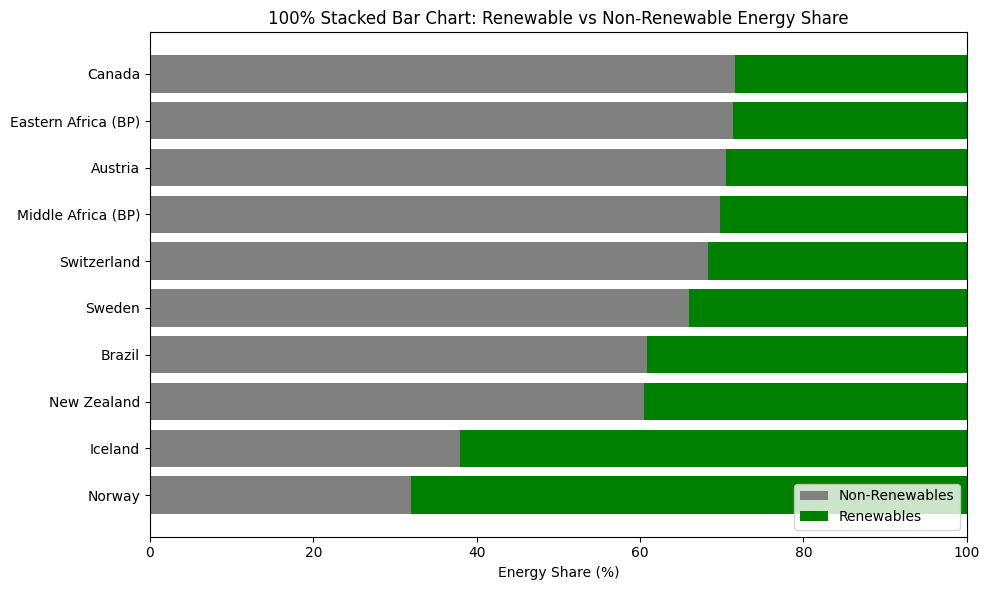

In [25]:
# Stacked Bar Chart (pg. 57 from Storytelling with Data reading)

df = pd.read_csv('renewable_energy_trends.csv')
df_clean = df.dropna(subset=["Entity", "Renewables (% equivalent primary energy)"])
avg_by_country = (
    df_clean.groupby("Entity")["Renewables (% equivalent primary energy)"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_by_country.columns = ["Country", "Renewables"]
avg_by_country["Non-Renewables"] = 100 - avg_by_country["Renewables"]

top_n = 10
subset = avg_by_country.head(top_n)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(subset["Country"], subset["Non-Renewables"], color="gray", label="Non-Renewables")
ax.barh(subset["Country"], subset["Renewables"], left=subset["Non-Renewables"], color="green", label="Renewables")

ax.set_xlim(0, 100)
ax.set_xlabel("Energy Share (%)")
ax.set_title("100% Stacked Bar Chart: Renewable vs Non-Renewable Energy Share")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()